In [ ]:
import numpy as np
import pandas as pd
# Reading dataset
df = pd.read_csv('/content/Cyber_Threat_Detection.csv')
df.head()
# See the no. of rows and columns
df.shape
df.dtypes
df.describe()
# Remove unwanted columns
df.drop(columns=['Activity_ID', 'User_Agent','Activity_Time'], inplace=True) # specify the columns to remove
data_cols = df.columns.tolist()
print(data_cols)
#dataset info after  removing unwanted features
df.info()
# find the null values
df.isnull().sum()
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64']).columnsdf[num_columns] = df[num_columns].fillna(df[num_columns].mean())
# find the null values
df.isnull().sum()




['Source_IP', 'Destination_IP', 'Protocol', 'Port', 'Bytes_Transferred', 'Connection_Type', 'Threat_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source_IP          674 non-null    object 
 1   Destination_IP     700 non-null    object 
 2   Protocol           700 non-null    object 
 3   Port               665 non-null    float64
 4   Bytes_Transferred  675 non-null    float64
 5   Connection_Type    700 non-null    object 
 6   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 38.4+ KB


,0
Source_IP,26
Destination_IP,0
Protocol,0
Port,0
Bytes_Transferred,0
Connection_Type,0
Threat_Level,0


In [ ]:
#categorical columns
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])
df.isnull().sum()



,0
Source_IP,0
Destination_IP,0
Protocol,0
Port,0
Bytes_Transferred,0
Connection_Type,0
Threat_Level,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
 df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,Source_IP,Destination_IP,Protocol,Port,Bytes_Transferred,Connection_Type,Threat_Level
0,576,70,0,6353.000000,8718.000000,0,1
1,508,293,0,55777.000000,1255.000000,1,1
2,87,328,0,52094.000000,5057.075556,0,1
3,661,455,2,33262.221053,5057.075556,0,0
4,78,472,2,19970.000000,8456.000000,0,0
...,...,...,...,...,...,...,...
695,559,259,0,33262.221053,1261.000000,1,0
696,408,464,2,9931.000000,4727.000000,1,0
697,316,225,1,57641.000000,7401.000000,1,1
698,160,611,1,10909.000000,4658.000000,1,0


In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


In [ ]:
df

,Source_IP,Destination_IP,Protocol,Port,Bytes_Transferred,Connection_Type,Threat_Level
0,576,70,0,0.082554,0.872657,0,1
1,508,293,0,0.849067,0.116604,1,1
2,87,328,0,0.791948,0.501781,0,1
3,661,455,2,0.499887,0.501781,0,0
4,78,472,2,0.293739,0.846115,0,0
...,...,...,...,...,...,...,...
695,559,259,0,0.499887,0.117212,1,0
696,408,464,2,0.138045,0.468342,1,0
697,316,225,1,0.877976,0.739236,1,1
698,160,611,1,0.153213,0.461351,1,0


In [ ]:
# replace 'Threat_Level' with your target column name
X = df.drop('Threat_Level', axis=1) # -- independent variable
y = df['Threat_Level']


In [ ]:
#training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.5333333333333333
Random Forest Confusion Matrix:
 [[67 44]
 [54 45]]


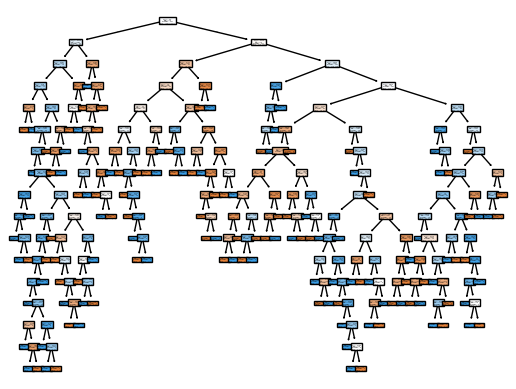

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.49523809523809526
Logistic Regression Confusion Matrix:
 [[65 46]
 [60 39]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model
best_accuracy = logreg_accuracy if logreg_accuracy > rf_accuracy else rf_accuracy
best_accuracy


0.5190476190476191

In [ ]:
# Save the best model as a .pkl file
import pickle
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


['Source_IP', 'Destination_IP', 'Protocol', 'Port', 'Bytes_Transferred', 'Connection_Type', 'Threat_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source_IP          674 non-null    object 
 1   Destination_IP     700 non-null    object 
 2   Protocol           700 non-null    object 
 3   Port               665 non-null    float64
 4   Bytes_Transferred  675 non-null    float64
 5   Connection_Type    700 non-null    object 
 6   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 38.4+ KB
Random Forest Accuracy: 0.5285714285714286
Random Forest Confusion Matrix:
 [[65 46]
 [53 46]]


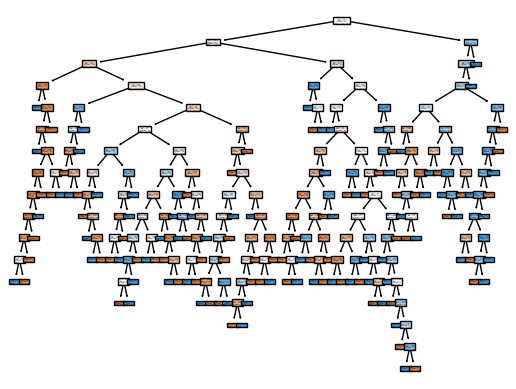

Logistic Regression Accuracy: 0.49523809523809526
Logistic Regression Confusion Matrix:
 [[65 46]
 [60 39]]
0.5285714285714286
Best model saved as 'best_model.pkl'


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Source_IP,Destination_IP,Protocol,Port,Bytes_Transferred,Connection_Type,Threat_Level
0,576,70,0,0.082554,0.872657,0,1
1,508,293,0,0.849067,0.116604,1,1
2,87,328,0,0.791948,0.501781,0,1
3,661,455,2,0.499887,0.501781,0,0
4,78,472,2,0.293739,0.846115,0,0
...,...,...,...,...,...,...,...
695,559,259,0,0.499887,0.117212,1,0
696,408,464,2,0.138045,0.468342,1,0
697,316,225,1,0.877976,0.739236,1,1
698,160,611,1,0.153213,0.461351,1,0


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle


# Reading dataset
df = pd.read_csv('/content/Cyber_Threat_Detection.csv')
df.head()
# See the no. of rows and columns
df.shape
df.dtypes
df.describe()
# Remove unwanted columns
df.drop(columns=['Activity_ID', 'User_Agent','Activity_Time'], inplace=True) # specify the columns to remove
data_cols = df.columns.tolist()
print(data_cols)
#dataset info after  removing unwanted features
df.info()
# find the null values
df.isnull().sum()
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

# find the null values
df.isnull().sum()

#categorical columns
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])
df.isnull().sum()

# Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
for column in cat_columns:
 df[column] = label_encoder.fit_transform(df[column])
#display contents
df
# Scale numerical features with MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
#display contents
df

# create 2 tables without threat_level and only threat_level as target
X = df.drop('Threat_Level', axis=1) # -- independent variable
y = df['Threat_Level']

#training
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

#Train Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

# Train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
# Evaluate Logistic Regression model
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model
best_accuracy = logreg_accuracy if logreg_accuracy > rf_accuracy else rf_accuracy
print(best_accuracy)

# Save the best model as a .pkl file
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")
df